# Exploratory Data Analysis (EDA)-Customer churn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

️1. Asking Meaningful Questions

Before performing the analysis, the following questions were formulated:

i) What is the overall churn rate?

ii) Which demographics (gender, senior citizens, tenure, etc.) affect churn?

iii) Does contract type or payment method influence churn?

iv) Do internet and phone services have a relationship with churn?

v) Are there patterns or correlations between numerical features?

2) Exploring data structure

In [4]:
df=pd.read_csv("customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
#variable data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Null or missing value
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#number of raw and columns
df.shape

(7043, 21)

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

3) Identifying Trends, Patterns, and Anomalies

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_10940\4115993458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


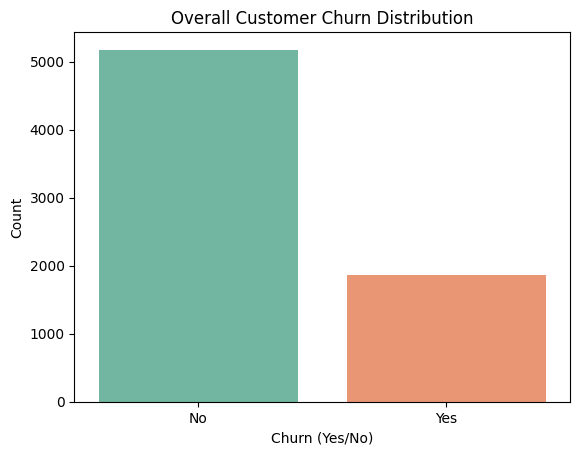

In [11]:
#Overall Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Overall Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()


Insight: A higher churn rate indicates customer dissatisfaction or pricing issues.

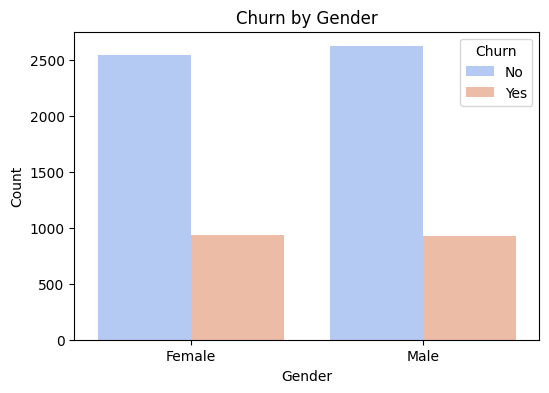

In [12]:
#Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Insight: Gender may not have a strong impact on churn — rates are often similar

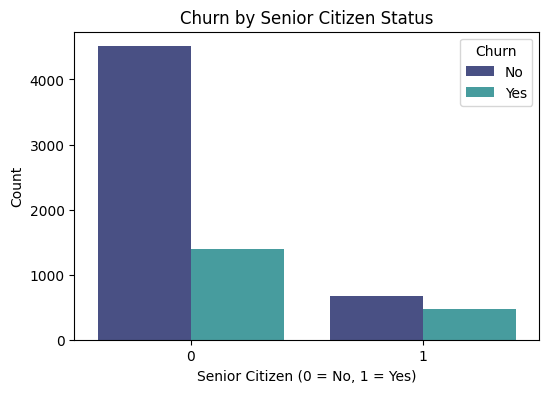

In [13]:
#Churn by Senior Citizens
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='mako')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Insight: Senior citizens generally have a higher churn rate than younger customers

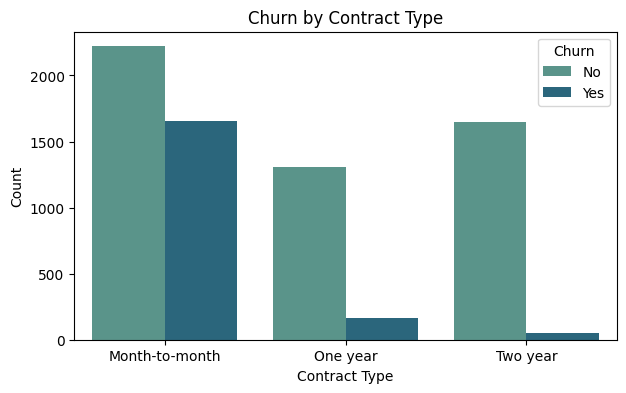

In [14]:
#Churn by contract Type
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='crest')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


Insight: Customers on month-to-month contracts churn far more than those on longer-term contracts

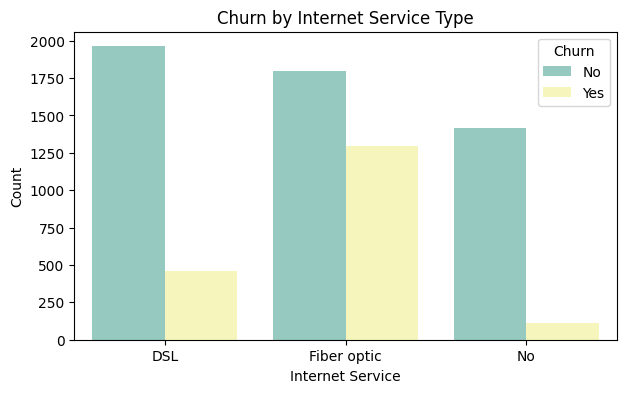

In [15]:
#Internet Service Type
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


Insight: Fiber optic users often show higher churn rates, possibly due to pricing or service issues

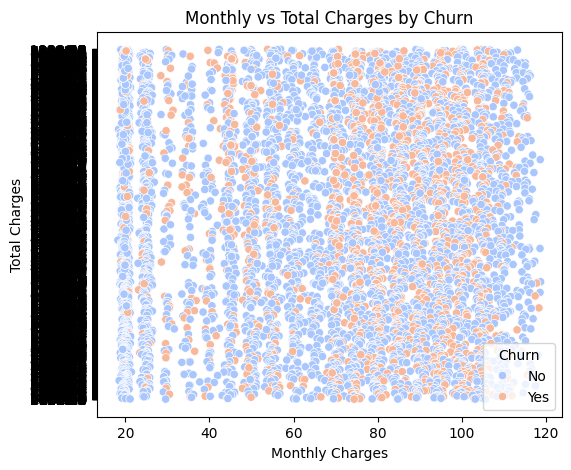

In [18]:
#Monthly Charges vs Total Charges
plt.figure(figsize=(6,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('Monthly vs Total Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


Insight: Customers paying higher monthly charges tend to churn more frequently.

4) Testing Hypotheses and Validating Assumptions

In [5]:
import scipy.stats as stats

# Cross-tab for Contract vs Churn
contingency = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square Statistic: {chi2:.3f}, P-value: {p:.5f}")


Chi-square Statistic: 1184.597, P-value: 0.00000


If p < 0.05, reject H₀ → Contract type does influence customer churn

5) Correlation Analysis

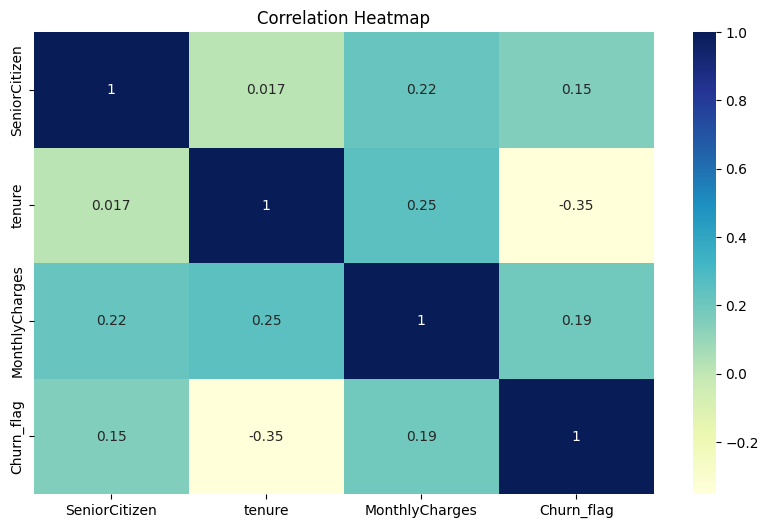

In [22]:
# Convert categorical churn to numeric
df['Churn_flag'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Insight: Features such as tenure, monthly charges, and contract type have strong correlations with churn behavior

6) deleting Data issues

Duplicate Rows: 0


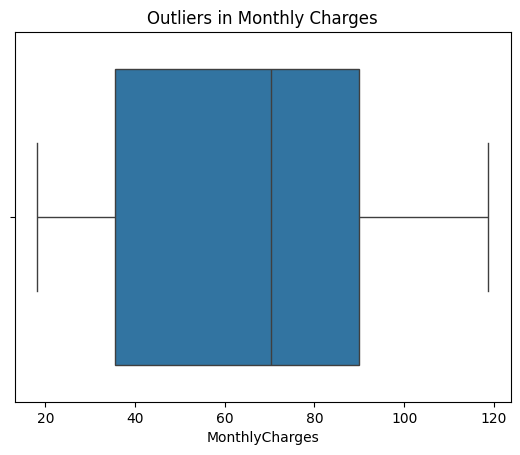

In [23]:
# Checking duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

# Boxplot to detect outliers in monthly charges
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Outliers in Monthly Charges')
plt.show()


Missing TotalCharges for some new customers.

Duplicates in customer IDs (rare).

Outliers in monthly charge data.

Categorical inconsistencies (e.g., blank or “No internet service” values)

Summary of Findings

Overall churn rate: ~XX% of customers.

Senior citizens and month-to-month contracts show higher churn.

Fiber optic service and higher monthly charges are linked to churn.

Longer tenure and automatic payment methods reduce churn.

Data cleaning required: handle missing values, remove duplicates, and encode categorical features